# Fuzzy logic

Install following prerequisities:

In [1]:
# Example
!pip install scikit-fuzzy

# Example 1

Create fuzzy sets for input variable temperature


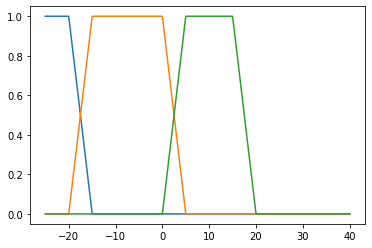

In [2]:
# Example 1
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

temp_x = np.linspace(-25,40,650)

very_cold = fuzz.trapmf(temp_x, [-25, -25, -20, -15])
cold = fuzz.trapmf(temp_x, [-20, -15, 0, 5])
warm = fuzz.trapmf(temp_x, [0, 5, 15, 20])


plt.plot(temp_x, very_cold)
plt.plot(temp_x, cold)
plt.plot(temp_x, warm)



## Task 1

Create fuzzy set for cold, warm and hot and plot all memebership functions to a single graph.

In [3]:
# Write your code here

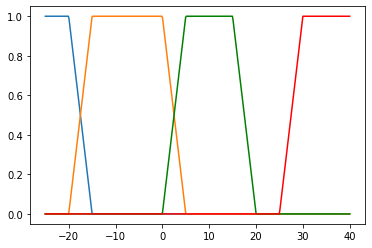

In [4]:
# Example 1
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

temp_x = np.linspace(-25,40,450)

very_cold = fuzz.trapmf(temp_x, [-25, -25, -20, -15])
cold = fuzz.trapmf(temp_x, [-20, -15, 0, 5])
warm = fuzz.trapmf(temp_x, [0, 5, 15, 20])
hot=fuzz.trapmf(temp_x, [25, 30, 40, 45])

plt.plot(temp_x, very_cold)
plt.plot(temp_x, cold)
plt.plot(temp_x, warm,c='g')
plt.plot(temp_x, hot,c='r')

## Task 2

Create fuzzy sets low, medium, high for heating.

In [5]:
# Write your code here

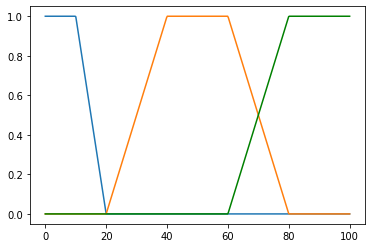

In [6]:
# Example 1
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

heat_x = np.linspace(0,100,450)

low = fuzz.trapmf(heat_x, [-10, 0, 10, 20])
medium = fuzz.trapmf(heat_x, [20, 40, 60, 80])
high = fuzz.trapmf(heat_x, [60, 80, 100, 120])


plt.plot(heat_x, low)
plt.plot(heat_x, medium)
plt.plot(heat_x, high,c='g')

## Task 3

Create fuzzy sets closed, partially, half, nearly, open.

In [7]:
# Write your code here

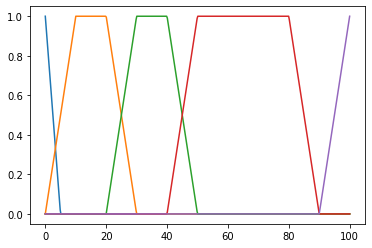

In [8]:
# Example 1
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

window_x = np.linspace(0,100,450)

closed = fuzz.trapmf(window_x, [0, 0, 0, 5])
partially = fuzz.trapmf(window_x, [0, 10, 20, 30])
half = fuzz.trapmf(window_x, [20, 30, 40, 50])
nearly = fuzz.trapmf(window_x, [40, 50, 80, 90])
open = fuzz.trapmf(window_x, [90,100,100,100])



plt.plot(window_x, closed)
plt.plot(window_x, partially)
plt.plot(window_x, half)
plt.plot(window_x, nearly)
plt.plot(window_x, open)

## Task 4

According to this tutorial create fuzzy system.
https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html


Create rules for our fuzzy variable window, temperature, heating and observe the fuzzy output.

In [9]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl


window_c = ctrl.Antecedent(window_x, 'window')
temperature_c = ctrl.Antecedent(temp_x, 'temperature')
heating_c = ctrl.Consequent(heat_x, 'heating')


In [10]:
heating_c['LOW']=low
heating_c['MEDIUM']=medium
heating_c['HIGH']=high

temperature_c['V.COLD']=very_cold
temperature_c['COLD']=cold
temperature_c['WARM']=warm
temperature_c['HOT']=hot

window_c['CLOSED']=closed
window_c['PARTIALLY']=partially
window_c['HALF']=half
window_c['NEARLY']=nearly
window_c['OPEN']=open




c:\Users\E0IN\anaconda3\envs\DP\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\E0IN\anaconda3\envs\DP\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\E0IN\anaconda3\envs\DP\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


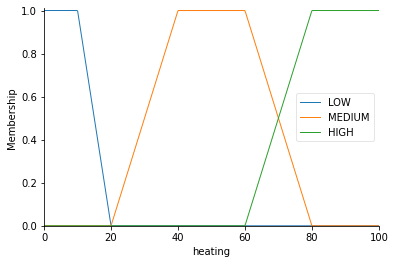

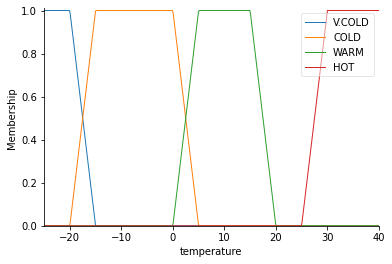

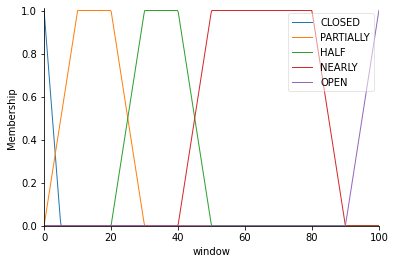

In [11]:
heating_c.view()
temperature_c.view()
window_c.view()

In [12]:
rule1 = ctrl.Rule(window_c['OPEN'] & temperature_c['COLD'], heating_c['HIGH'])
rule2 = ctrl.Rule(window_c['CLOSED'] | temperature_c['HOT'], heating_c['LOW'])
rule3 = ctrl.Rule(window_c['HALF'] , heating_c['MEDIUM'])
rule4 = ctrl.Rule(temperature_c['HOT'] , heating_c['LOW'])
rule5 = ctrl.Rule(temperature_c['V.COLD'] , heating_c['HIGH'])
rule6 = ctrl.Rule(temperature_c['V.COLD'] & window_c['CLOSED'] , heating_c['MEDIUM'])
rule7 = ctrl.Rule(temperature_c['WARM'] | window_c['CLOSED'] , heating_c['LOW'])
rule8 = ctrl.Rule(temperature_c['HOT'] & window_c['PARTIALLY'] , heating_c['MEDIUM'])
rule9 = ctrl.Rule(temperature_c['HOT'] | temperature_c['WARM'] & window_c['CLOSED'] , heating_c['LOW'])
rule10 = ctrl.Rule(temperature_c['V.COLD'] | temperature_c['COLD'] & window_c['OPEN'] , heating_c['HIGH'])
rule11 = ctrl.Rule(window_c['HALF'] | window_c['NEARLY'] | window_c['OPEN'] , heating_c['MEDIUM'])


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

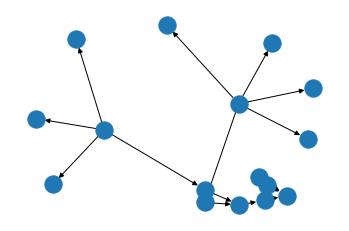

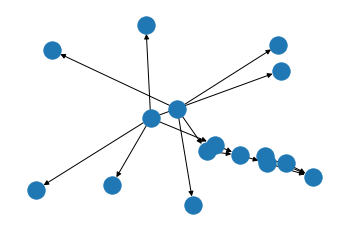

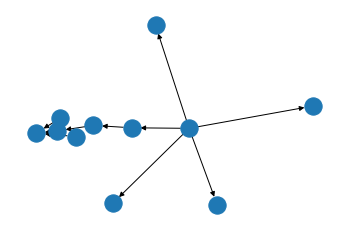

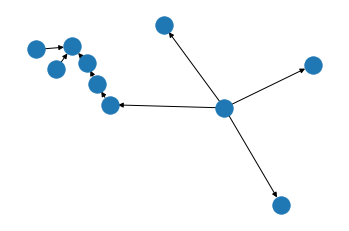

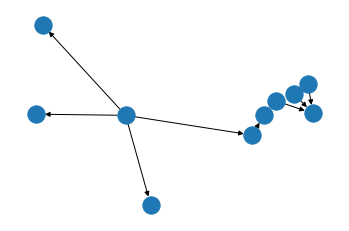

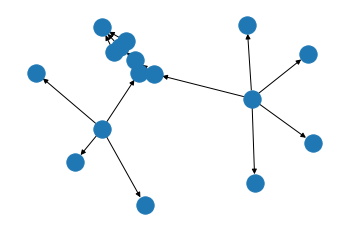

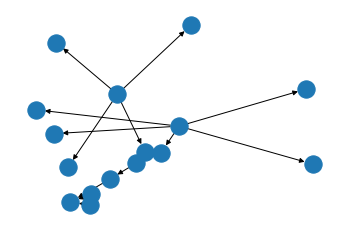

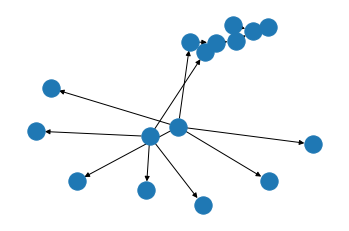

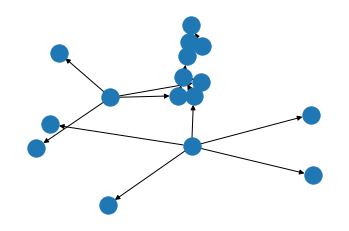

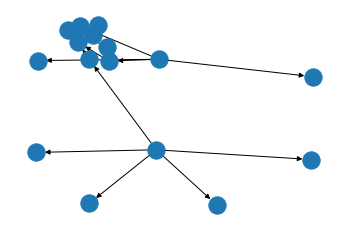

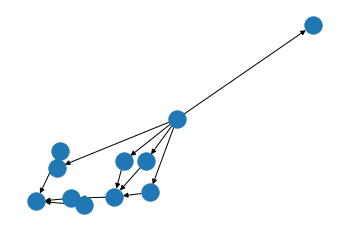

In [13]:
rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()
rule10.view()
rule11.view()


In [14]:
sim_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11])
simulation = ctrl.ControlSystemSimulation(sim_ctrl)


In [104]:
simulation.input['temperature'] = -20
simulation.input['window'] =20
simulation.compute()

In [105]:
print(simulation.output)

OrderedDict([('heating', 84.20623119247585)])


c:\Users\E0IN\anaconda3\envs\DP\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


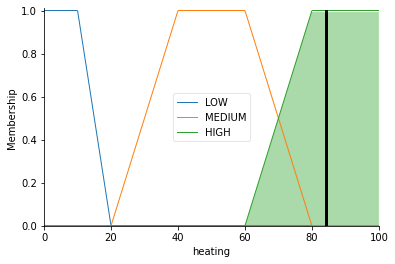

In [106]:
heating_c.view(sim=simulation)
